In [1]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X,y = make_classification(
    n_samples=1800,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=50,
    n_repeated=0,
    n_redundant=0
)

pd.DataFrame(X)

,0,1
0,0.440012,-2.300197
1,1.321404,1.774453
2,0.816309,1.858987
3,1.018436,-0.739348
4,1.569294,-1.428081
...,...,...
1795,1.780886,-2.262749
1796,1.106726,-0.194915
1797,1.563437,0.579967
1798,-2.013661,0.931375


In [3]:
x_scalar = MinMaxScaler().fit_transform(X)
x_scalar = pd.DataFrame(x_scalar)
x_scalar

,0,1
0,0.666985,0.063973
1,0.774230,0.599778
2,0.712771,0.610894
3,0.737366,0.269221
4,0.804392,0.178654
...,...,...
1795,0.830138,0.068898
1796,0.748108,0.340812
1797,0.803679,0.442707
1798,0.368430,0.488916


In [4]:
def kRandomCentroids(k):
     
    # centroids = []
    # for i in range(k):
    #     singleCentroid = x_scalar.apply(lambda x: float(x.sample()))
    #     centroids.append(singleCentroid)
    # return pd.concat(centroids, axis=1)
    return x_scalar.sample(n=k).T
randomCentroids = kRandomCentroids(4)
randomCentroids

,1568,569,1332,1100
0,0.68600,0.769706,0.816670,0.586264
1,0.35106,0.456491,0.313161,0.578316


In [5]:
def euclidianDistance(centroids, data):
    return centroids.apply(lambda x: np.sqrt((data - x) ** 2).sum(axis = 1))
distance = euclidianDistance(randomCentroids, x_scalar)
distance

,1568,569,1332,1100
0,0.306102,0.495239,0.398872,0.595064
1,0.336947,0.147810,0.329058,0.209428
2,0.286605,0.211338,0.401632,0.159085
3,0.133205,0.219611,0.123244,0.460197
4,0.290798,0.312523,0.146784,0.617790
...,...,...,...,...
1795,0.426300,0.448025,0.257731,0.753293
1796,0.072356,0.137277,0.096213,0.399349
1797,0.209325,0.047758,0.142536,0.353025
1798,0.455426,0.433701,0.623995,0.307234


In [6]:
def makeCluster(distance):
    clus = []
    for i in range(distance.shape[0]):
        clus.append((distance.iloc[i, :].argmin(), i))
    return pd.DataFrame(clus)
cluster = makeCluster(distance)
cluster

,0,1
0,0,0
1,1,1
2,3,2
3,2,3
4,2,4
...,...,...
1795,2,1795
1796,0,1796
1797,1,1797
1798,3,1798


In [7]:
def makeNewCentroid(cluster, data, k):
    newCentroid = []
    for i in range(k):
        lis = []
        for j in range(cluster.shape[0]):
            if cluster.iloc[j, 0] == i:
                lis.append(data.iloc[cluster.iloc[j, 1], :])
        lis = pd.DataFrame(lis)
        newCentroid.append((np.mean(lis.iloc[:, 0]), np.mean(lis.iloc[:, 1])))
    return pd.DataFrame(newCentroid).T

newCentroid = makeNewCentroid(cluster, x_scalar, 4)
newCentroid

,0,1,2,3
0,0.636201,0.768270,0.797520,0.498334
1,0.285404,0.497939,0.249316,0.562092


In [21]:
centroid = pd.DataFrame()
distance = pd.DataFrame()
cluster = pd.DataFrame()
def kmeans(k):
    global centroid, distance, cluster
    i = 1
    oldCentroid = pd.DataFrame()
    centroid = kRandomCentroids(k)

    while i <= 50 and not centroid.equals(oldCentroid):
        oldCentroid = centroid
        distance = euclidianDistance(centroid, x_scalar)
        cluster = makeCluster(distance)
        centroid = makeNewCentroid(cluster, x_scalar, k)
        i += 1
kmeans(5)
centroid

,0,1,2,3,4
0,0.391400,0.718795,0.502783,0.745101,0.730735
1,0.616959,0.181745,0.430772,0.332938,0.523946


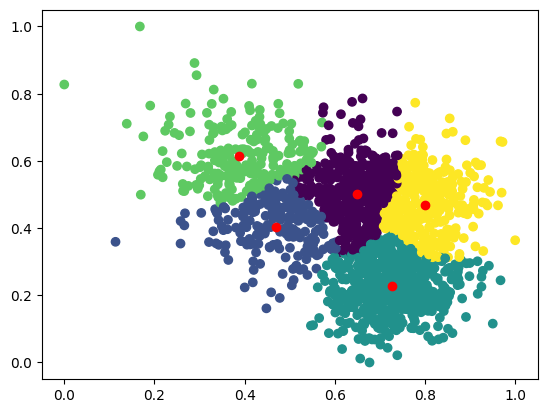

In [9]:
plt.scatter(x_scalar.iloc[:, 0], x_scalar.iloc[:, 1], c=cluster.iloc[:, 0])
plt.scatter(centroid.iloc[0, :], centroid.iloc[1, :], c='red')

In [10]:
wcss = []
def elbowMethod():
    for i in range(1, 11):
        dis = []
        kmeans(i)
        for j in range(distance.shape[0]):
            dis.append(min(distance.iloc[j, :]))
        wcss.append(sum(dis))
elbowMethod()
wcss

[455.6106542521172,
 328.3829165480921,
 250.38570782263534,
 227.23486897413818,
 206.30639950611624,
 191.97539100401303,
 176.69206971817786,
 166.40283557185654,
 158.59429727172318,
 152.82524679337817]

Text(0, 0.5, 'wcss values')

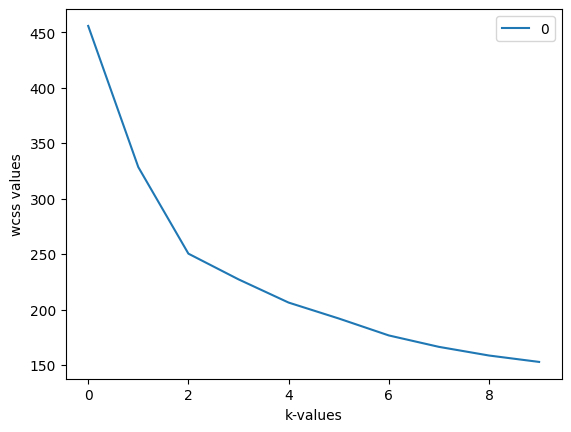

In [11]:
pd.DataFrame(wcss).plot(kind='line')
plt.xlabel('k-values')
plt.ylabel('wcss values')

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=50, n_init=10)
cluster = kmeans.fit_predict(x_scalar)
cluster

centroid = pd.DataFrame(kmeans.cluster_centers_)



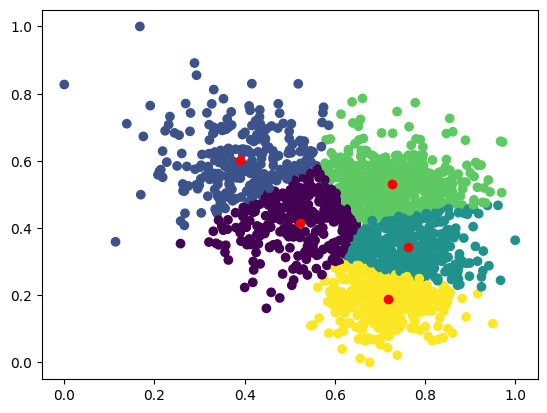

In [13]:
plt.scatter(x_scalar.iloc[:, 0], x_scalar.iloc[:, 1], c=cluster)
plt.scatter(centroid.iloc[:, 0], centroid.iloc[:, 1], c='red')

<Axes: >

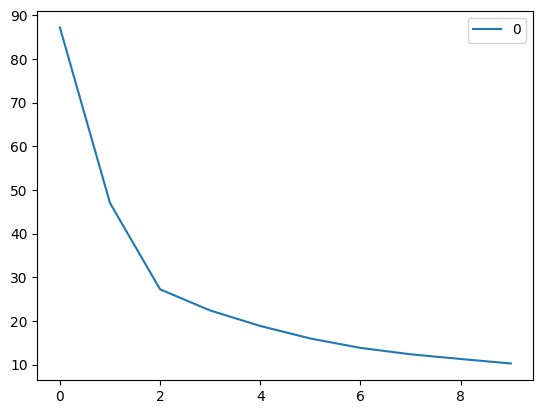

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,init='k-means++', n_init=10).fit(x_scalar)
    wcss.append(kmeans.inertia_)
    
pd.DataFrame(wcss).plot(kind='line')

In [45]:
centroid.index = ['feature 1', 'feature 2']
# centroid.insert(4, 'madarboard', ['Day 1', 'Day 2'])
pd.unique(centroid.iloc[0])
centroid.columns
centroid.values

array([[0.39140048775570024, 0.7187950129812664, 0.5027825096352512,
        0.7451006770415903, 'Day 1', 0.7307348271449993],
       [0.6169589469795768, 0.18174521364130608, 0.43077180636829693,
        0.33293777012065046, 'Day 2', 0.5239460081857887]], dtype=object)